In [8]:
#%run -i '../../scripts/utility_readblt.py' 'mutau'

In [1]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

Welcome to JupyROOT 6.13/02


# 1. Read data and MC as dataframe

In [18]:
selection  = "mutau"
nbjetcut   =  "==1"

pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/pickle/{}/".format(selection)

cuts = GetSelectionCut(selection) + "& (nBJets{})".format(nbjetcut)

Data = LoadDataframe(pickledir + "data2016").query(cuts)
Fake = LoadDataframe(pickledir + "data2016_inverseISO").query("nBJets{}".format(nbjetcut))
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

In [19]:
# signal mc is tt+tW
MCsg = pd.concat([MCt,MCtt],ignore_index=True)

MCsgf = MCsg.query('genCategory in [16,21] ') # semilep and had
MCsg0 = MCsg.query('genCategory in [1,2,3, 4,5,6,7,8,9, 10,11,12]') #other lep
MCsg1 = MCsg.query('genCategory in [17]') #muh
MCsg2 = MCsg.query('genCategory in [18,19,20]') #tauh
MCsg3 = MCsg.query('genCategory in [13,14,15]') #mutau

df_list = [Fake, MCzz,MCdy,MCsgf,MCsg0,MCsg1,MCsg2,MCsg3,Data]

# 2. Plot kinematics

In [20]:
pp = pd.read_csv("plotparameters.csv")
label_list = ["Fakes","Diboson","V+Jets",r'$tt/tW \rightarrow l + h$ (other)',
              r'$tt/tW \rightarrow l + l$ (other) ',
              r'$tt/tW \rightarrow \mu + h$', 
              r'$tt/tW \rightarrow \tau + h$',
              r'$tt/tW \rightarrow \mu + \tau$',
              'data']
color_list = ["gray","#a32020","#e0301e","#eb8c00","gold","#49feec","deepskyblue","mediumpurple","k"]
plotoutdir = GetPlotDir(selection, nbjetcut)
print(plotoutdir)

/home/zchen/Documents/Analysis/workplace/plot/mutau/binned_nBJets/1b/


In [23]:
for index, row in pp.iterrows():
    v,a,b,step,xl = row["var"],row["lower"],row["upper"],row["step"],row["xlabel"]
    plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.045,1,1,1,1,1,1,1])
    plotter.settingPlot(xl, label_list, color_list)
    plotter.makePlot(plotoutdir)
    
    # print out process
    print("making plots: {0}/{1}".format(index,len(pp)))
    clear_output(wait=True)
    plt.close()
print('finish all making plots')

finish all making plots


/home/zchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


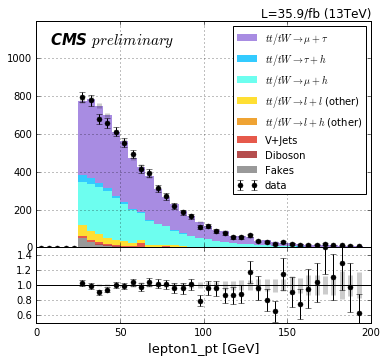

In [11]:
v,a,b,step,xl = "lepton1_pt",0,200,5,"lepton1_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.006,1,1,1,1,1,1,1])
plotter.settingPlot(xl,label_list,color_list)
plotter.makePlot()

# 3. Counting

In [12]:
ctr = SelectionCounter()

In [13]:
print("(nBJets{})".format(nbjetcut))

print("MCtt: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=False)) )
print("MCtt width: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=True)) )

print("MCt : {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=False)) )
print("MCt width: {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=True)) )

(nBJets>1)
MCtt: [1, 105, 200, 0, 1, 1, 0, 1194, 1, 0, 7, 0, 46, 18, 21154, 0, 12492, 0, 639, 6, 5]
MCtt width: [0.9693017601966858, 96.37260912824422, 173.94741579284891, 0, 0.25003719329833984, 0.9770433902740479, 0, 1092.347938453313, 0.9850260019302368, 0, 5.81032570451498, 0, 42.40920911717694, 16.55988121032715, 19546.619352917613, 0, 11549.301497020333, 0, 585.1098319487646, 6.163519084453583, 4.971301198005676]
MCt : [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 110, 0, 52, 0, 3, 0, 0]
MCt width: [0, 0, 0, 0, 0, 0, 0, 3.8919982612133026, 0, 0, 0, 0, 1.077918529510498, 0, 105.13293015258387, 0, 50.17336066067219, 0, 3.0244129300117493, 0, 0]


In [12]:
ctr.countSlt_Scaled(df_list)

NameError: name 'ctr' is not defined

In [14]:
for thisdf in [Fake, MCzz, MCdy, MCt, MCtt, Data]:
    n = np.sum(thisdf.eventWeight)
    nerr = np.sum(thisdf.eventWeight**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

21141.00,145.40
8.62,2.45
96.03,19.78
235.13,17.44
7105.49,36.58
7409.00,86.08


In [16]:
21141.00*0.006

126.846

In [24]:
# print Generator information
f = ROOT.TFile("../../data/root/2016MC.root")
print("MCtt : {}".format(ctr.countGen_ByTauDecay(f,'ttbar_inclusive')) )
temp = np.array(ctr.countGen_ByTauDecay(f,'t_tw'))
temp+= np.array(ctr.countGen_ByTauDecay(f,'tbar_tw'))
print("MCt  : {}".format(list(temp)) )

MCtt : [1811409.0, 1811532.0, 3620281.0, 57057.0, 54227.0, 111125.0, 418126.0, 418126.0, 763147.0, 642646.0, 626108.0, 2350887.0, 643368.0, 627277.0, 2353727.0, 22670017.0, 22653517.0, 4016590.0, 3923504.0, 14718933.0, 70930278.0]
MCt  : [23105.0, 23040.0, 46342.0, 694.0, 717.0, 1420.0, 5260.0, 5260.0, 9727.0, 8199.0, 8029.0, 30054.0, 8163.0, 8006.0, 29970.0, 290101.0, 289467.0, 50864.0, 50050.0, 187515.0, 904067.0]


In [4]:
f = ROOT.TFile("../../data/root/2016MC.root")

In [40]:
t = f.Get('mutau/bltTree_ww')

In [41]:
t 

<ROOT.TTree object ("bltTree_ww") at 0x7f8208210ff0>